# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.to_csv('./mnist_784_X.csv')
df_y.to_csv('./mnist_784_y.csv')

b) Plot the singular value plot for a single example of the 0 digit (5 points)

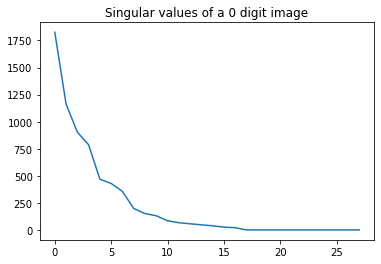

In [18]:
matrix = np.array(X[1].reshape(28, 28))
u, s, v = np.linalg.svd(np.array(X[1]).reshape(28, 28),full_matrices=False)
_ = plt.plot(s)
plt.title('Singular values of a 0 digit image')
plt.show()

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

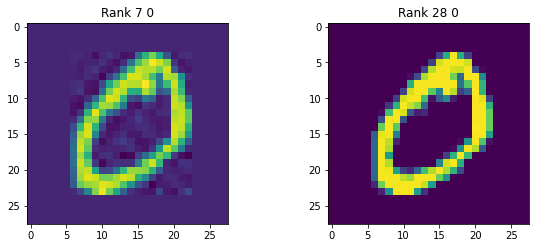

In [24]:
RANK = 7
scopy = s.copy()
scopy[RANK:]=0
approx = u.dot(np.diag(scopy)).dot(v)
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(approx)
plt.title('Rank '+str(RANK)+' 0')
plt.subplot(1,2,2)
plt.imshow(np.array(X[1]).reshape(28, 28))
plt.title('Rank 28 0')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. (10 points)

In [51]:
xcopy = X.copy()
X_SVD = []
for i in range(len(xcopy)):
    matrix = np.array(xcopy[i]).reshape(28, 28)
    u,s,v = np.linalg.svd(matrix,full_matrices=False)
    for j in range(len(s)):
        if s[j] < 1:
            s[j:] = 0
    approx = u.dot(np.diag(s)).dot(v)
    X_SVD.append(np.array(approx).reshape(784,))
df_X_SVD = pd.DataFrame(X_SVD)
df_X_SVD.to_csv('./df_X_SVD.csv')

I observed that the singular vectors contains some numbers that are almost approching 0. So I pick the rank to be the numbers less than 1

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. (10 points)

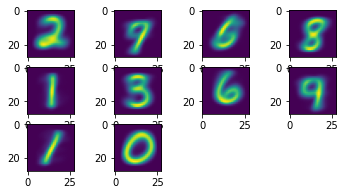

In [64]:
from sklearn.cluster import KMeans
kmeans_SVD = KMeans(n_clusters=10, random_state=0).fit(X_SVD)
label_SVD = kmeans.fit_predict(X_SVD)
centers_SVD = np.array(kmeans_SVD.cluster_centers_).reshape(10,28,28)
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(centers_SVD[i])

f) Repeat e) on the original dataset. Comment on any differences (or lack thereof) you observe. (8 points)

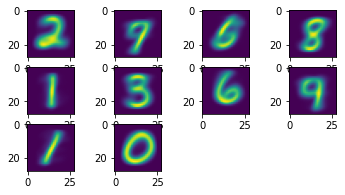

In [63]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
label = kmeans.fit_predict(X)
centers = np.array(kmeans.cluster_centers_).reshape(10,28,28)
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(centers[i])
# It's almost the same, there is no 4

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [66]:
def disagreement_dist(P_labels, C_labels):
    dis = 0
    for i in range(len(P_labels)):
        for j in range(i+1, len(P_labels)):
            if P_labels[i] != P_labels[j] and C_labels[i] != C_labels[j]:
                dis += 0
            elif P_labels[i] == P_labels[j] and C_labels[i] == C_labels[j]:
                dis += 0
            else:
                dis += 1
    return dis
print(disagreement_dist(label_SVD, y))
print(disagreement_dist(label, y))

289492981
289492981


This is not accurate

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [78]:
matrix_diff = []
for i in range(len(X)):
    matrix = np.array(X[i]).reshape(28,28)
    u,s,v = np.linalg.svd(matrix,full_matrices=False)
    s[10:] = 0
    approx = u.dot(np.diag(s)).dot(v)
    matrix_diff.append(np.array(np.subtract(matrix, approx)).reshape(784,))

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

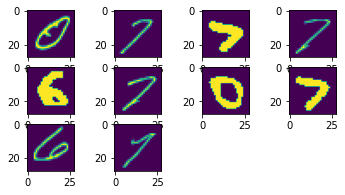

In [129]:
import heapq as hq
dist = []
for i in range(len(X)):
    dist.append(np.linalg.norm(matrix_diff[i]))
largest = hq.nlargest(10, dist)
index = []
for i in range(len(dist)):
    if dist[i] in largest:
        index.append(i)
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(np.array(X[index[i]]).reshape(28, 28))

Because from these images are outliners

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

categories = ['alt.atheism','comp.graphics','rec.autos','sci.med']
news_data = fetch_20newsgroups(subset='train', categories=categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [151]:
from nltk.tokenize import word_tokenize
words = []
stem = []
stemmer = SnowballStemmer(language='english')
for i in range(len(news_data.data)):
    words.append(word_tokenize(news_data.data[i]))
for i in range(len(words)):
    s = []
    for w in words[i]:
        x = stemmer.stem(w)
        s.append(x)
    stem.append(' '.join(s))

c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [182]:
from numpy import savetxt
v = TfidfVectorizer(max_df=0.5, min_df=0.01)
vector = v.fit_transform(stem)
corpus = v.get_feature_names()
savetxt('./Tfidf_vector.csv', vector.toarray(), delimiter=',')

Set min_df to 0.05 because we want to ignore items like dates author names and max_df to 0.5 for I you he him or be

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

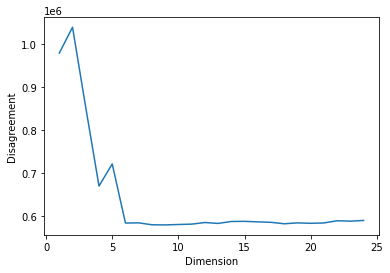

In [189]:
disagreement_distance = []
for k in range(1,25):
    u,s,v = np.linalg.svd(vector.toarray(),full_matrices=False)
    s[k:] = 0
    dim_reduced_dataset = u.dot(np.diag(s)).dot(v)
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()

The disagreement distance varies from rank. The higher the rank the lower the disagreement distance